In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
file = open('SMSSpamCollection')
labels = []
contents = []
all_spam = []
all_ham = []
for line in file:
    str_to_clean = line[4:]
    str_to_clean = str_to_clean.lower()
    str_to_clean = str_to_clean.lstrip()
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    str_to_clean = tokenizer.tokenize(str_to_clean)
    stop_words = set(stopwords.words('english'))
    str_to_clean = [w for w in str_to_clean if not w in stop_words]
    str_to_clean = " ".join(str_to_clean)
    contents.append(str_to_clean)
    if line[0] == 'h':
        labels.append(0)
        all_ham.append(str_to_clean)
    else:
        labels.append(1)
        all_spam.append(str_to_clean)
file.close()

In [2]:
d = {"label": labels, "contents": contents}
df = pd.DataFrame(d)
df.head()

,label,contents
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think goes usf lives around though


## This pie chart shows how skewed this data set is

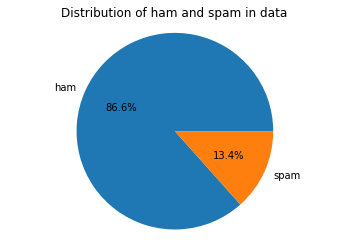

In [3]:
labels = 'ham', 'spam'
sizes = [len(all_ham), len(all_spam)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Distribution of ham and spam in data')
plt.show()

#### Let's make an even amount of ham and spam, and then use this for our model.

In [4]:
even_amount = all_spam + all_ham[:len(all_spam)]
a = [1] * len(all_spam)
b = [0] * len(all_spam)
total_y_array = a + b

In [5]:
d = {"label": total_y_array, "contents": even_amount}
even_df = pd.DataFrame(d)
even_df.head()

,label,contents
0,1,free entry 2 wkly comp win fa cup final tkts 2...
1,1,freemsg hey darling 3 week word back like fun ...
2,1,winner valued network customer selected receiv...
3,1,mobile 11 months u r entitled update latest co...
4,1,six chances win cash 100 20 000 pounds txt csh...


0.959866220735786 0.48494983277591974


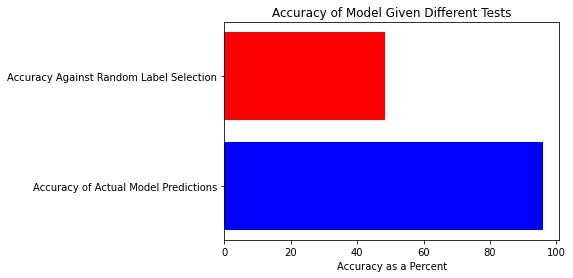

In [6]:
classifier = MultinomialNB()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(even_df.contents)
y = even_df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
new_acc = metrics.accuracy_score(y_test, predictions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
new_rand = metrics.accuracy_score(y_test, predictions)
print(new_acc, new_rand)
labels = ['Accuracy of Actual Model Predictions', 'Accuracy Against Random Label Selection']
y_pos = np.arange(len(labels))
performance = [new_acc * 100, new_rand * 100]

plt.barh(y_pos, performance, color=['blue', 'red'])
plt.yticks(y_pos, labels)
plt.xlabel('Accuracy as a Percent')
plt.title('Accuracy of Model Given Different Tests')

plt.show()

In [7]:
from wordcloud import WordCloud, STOPWORDS
text_for_cloud = ' '.join(all_spam)
wordcloud = WordCloud(width = 1200, height = 1000, random_state=1,
                      background_color='salmon', colormap='Pastel1', collocations=False,
                      stopwords = STOPWORDS).generate(text_for_cloud)

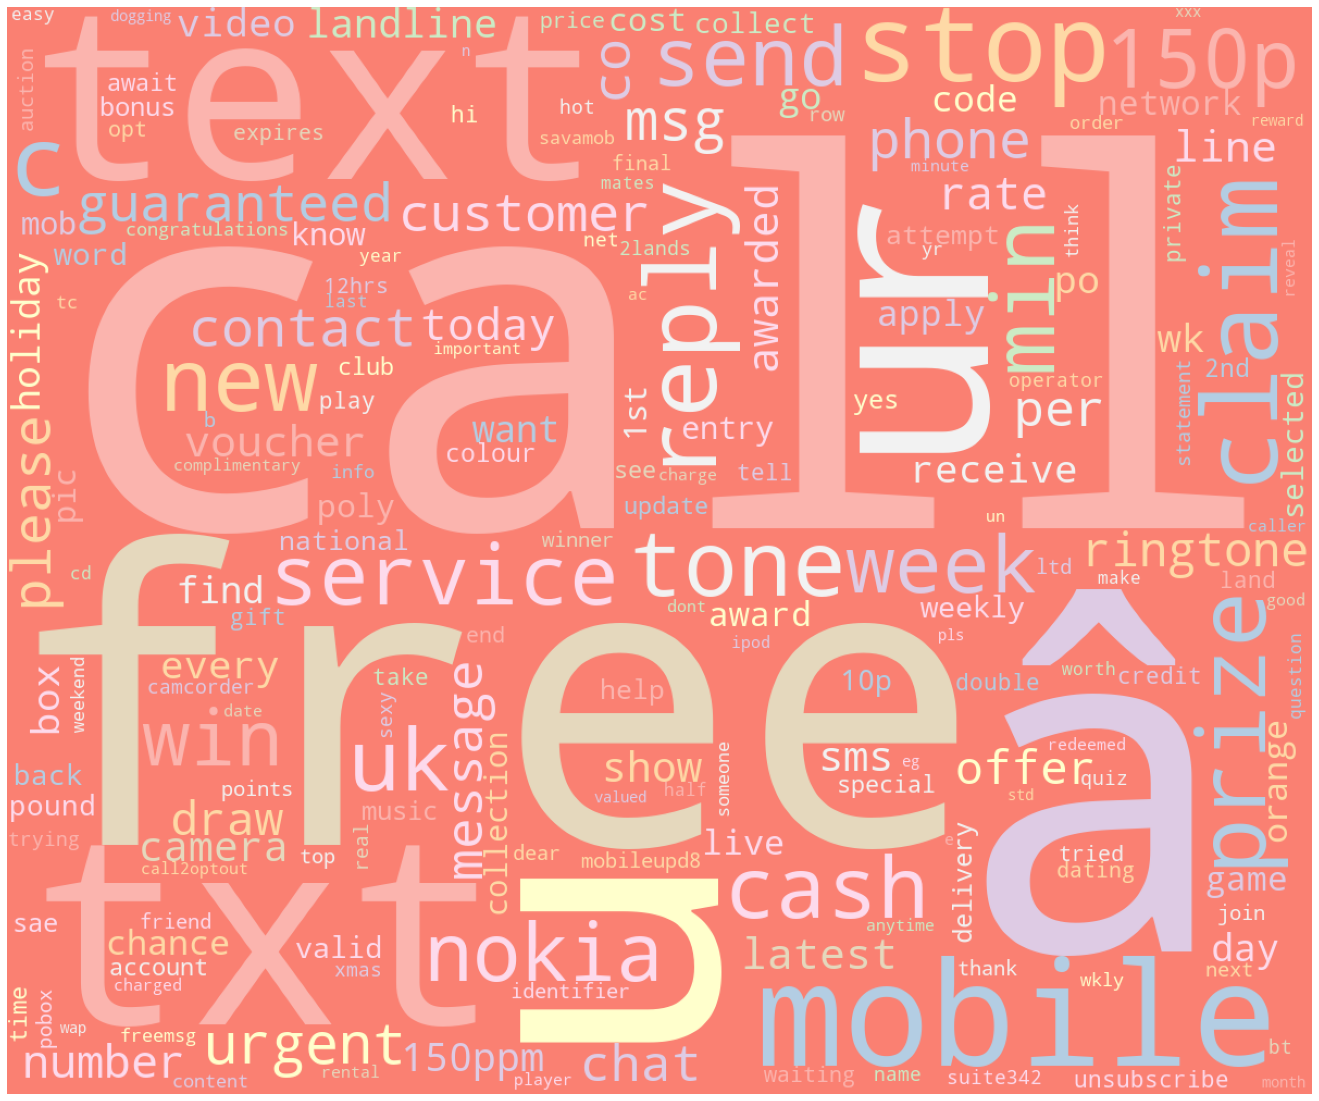

In [8]:
plt.figure(figsize=(25, 20))
plt.imshow(wordcloud)
plt.axis("off");

In [9]:
from statistics import mean
def run100(data):
    mod_acc_arr = []
    rand_acc_arr = []
    for i in range(100):
        classifier = MultinomialNB()
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(data.contents)
        y = data.label
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        mod_acc_arr.append(metrics.accuracy_score(y_test, predictions))
    return mean(mod_acc_arr)

In [10]:
file = open('SMSSpamCollection')
labels = []
contents = []
all_spam = []
all_ham = []
for line in file:
    str_to_clean = line[4:]
#     str_to_clean = str_to_clean.lower()
#     str_to_clean = str_to_clean.lstrip()
#     tokenizer = nltk.RegexpTokenizer(r"\w+")
#     str_to_clean = tokenizer.tokenize(str_to_clean)
#     stop_words = set(stopwords.words('english'))
#     str_to_clean = [w for w in str_to_clean if not w in stop_words]
#     str_to_clean = " ".join(str_to_clean)
    contents.append(str_to_clean)
    if line[0] == 'h':
        labels.append(0)
        all_ham.append(str_to_clean)
    else:
        labels.append(1)
        all_spam.append(str_to_clean)
file.close()
even_amount = all_spam + all_ham[:len(all_spam)]
a = [1] * len(all_spam)
b = [0] * len(all_spam)
total_y_array = a + b
d = {"label": total_y_array, "contents": even_amount}
dirty_df = pd.DataFrame(d)

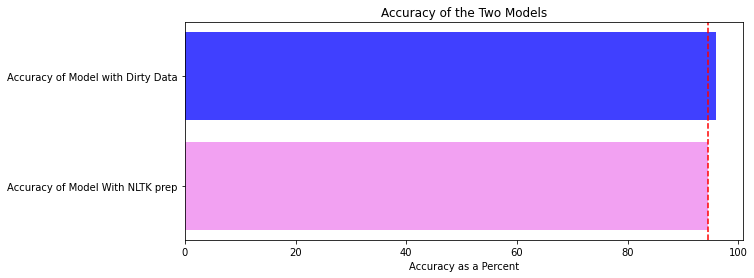

In [11]:
classifier = MultinomialNB()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dirty_df.contents)
y = dirty_df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
dirty_acc = metrics.accuracy_score(y_test, predictions)
objects = ('Accuracy of Model With NLTK prep', 'Accuracy of Model with Dirty Data')
y_pos = np.arange(len(objects))
new_acc = run100(even_df) * 100
dirty_acc = run100(dirty_df) * 100
performance = [new_acc, dirty_acc]
plt.figure(figsize=(10, 4))
plt.barh(y_pos, performance, align='center', alpha=0.75, color=['violet', 'blue'])
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy as a Percent')
plt.title('Accuracy of the Two Models')
plt.axvline(x=new_acc, ymin=0, ymax=1, color = 'red', linestyle = '--')
plt.show()